##  PCA: Food consumption

### For the task of conducting PCA on countries based on their food consumption patterns, the data matrix is organized as follows: each row represents a country, while each column corresponds to a specific food item or category. Therefore, the rows of the matrix represent individual countries, and the columns represent the various food consumption features.

### After setting up the data matrix, the next step involves extracting the first two principal components for each data point. This results in a two-dimensional representation of each country, as each country's data point is now represented by a two-dimensional vector derived from the principal components.

### Subsequently, a scatter plot is created to visualize the two-dimensional representations of the countries using their principal components. Countries are marked on the plot, facilitating easy identification.

### Upon observing the scatter plot, patterns may emerge, revealing insights into the similarities or differences in food consumption patterns among countries. For example, clusters of countries with similar diets may appear closer together in the plot, while countries with distinct dietary habits may be more distant from one another. Additionally, any outliers or notable deviations from the overall pattern can also be identified and analyzed for further understanding.



The data matrix is set-up with the columns as the "feature" vectors which is the food consumption and the rows as the countries. 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp
%matplotlib inline

# import data 
data = np.genfromtxt('data/food-consumption.csv',delimiter=',',dtype='U') 

In [2]:
data.shape

(17, 21)

In [3]:
# extract just the features
data_new = data[1:,1:]
data_new = data_new.astype('int32')
m,n = data_new.shape
# create the countries matrix
country = data[1:,0]
# normalize the data
std = np.std(data_new,axis = 0)
data_new = data_new @ np.diag(np.ones(std.shape[0])/std)
data_new = data_new.T
mu = np.mean(data_new,axis = 1)
xc = data_new - mu[:,None]

In [4]:
data_new.shape

(20, 16)

In [5]:
# PCA
C = np.dot(xc,xc.T)/m
# first two eigenvectors
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue

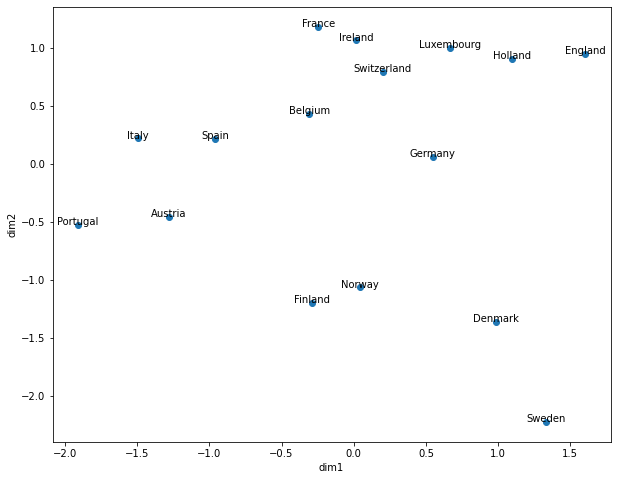

In [6]:
plt.rcParams["figure.figsize"] = [10.00, 8.0]
fig, ax = plt.subplots()
ax.scatter(dim1, dim2)
plt.xlabel('dim1')
plt.ylabel('dim2')

for i, txt in enumerate(country):
    ax.annotate(txt, (dim1[i], dim2[i]), ha='center')

Datapoints of Norway and Finland are close to each other, which could imply similar food consumption since these two countries are close in geographical locations. Together with the datapoints of Sweden and Denmark in the top left of the plot, this is similar to the geographical location as these 4 countries are the nordic countries. 

### For this phase of the analysis, PCA is conducted on the data with country consumptions treated as "feature" vectors for each food item. In essence, weight vectors are derived to combine country consumptions for each food item, providing an alternate approach to PCA. The goal is to project the data onto their two principal components, resulting in a two-dimensional representation for each food item.

### Following the PCA projection, a scatter plot is generated to visualize the two-dimensional representations of the food items. Each food item is marked on the plot for easy identification.

### Upon examining the scatter plot, patterns may become apparent, shedding light on the relationships and variations among different food items. For instance, clusters of food items with similar consumption patterns across countries may appear closer together in the plot, while food items with distinct consumption trends may be more distant from one another. Additionally, any outliers or noteworthy deviations from the overall pattern can be observed and analyzed to gain insights into factors influencing food consumption trends across countries.

In [7]:
# extract just the features
data_new = data[1:,1:]
data_new = data_new.astype('int32')
data_new = data_new.T
m,n = data_new.shape
# create the food matrix
food = data[0,1:]
# normalize the data
std = np.std(data_new,axis = 0)
data_new = data_new @ np.diag(np.ones(std.shape[0])/std)
data_new = data_new.T
mu = np.mean(data_new,axis = 1)
xc = data_new - mu[:,None]

In [8]:
# PCA
C = np.dot(xc,xc.T)/m
# first two eigenvectors
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


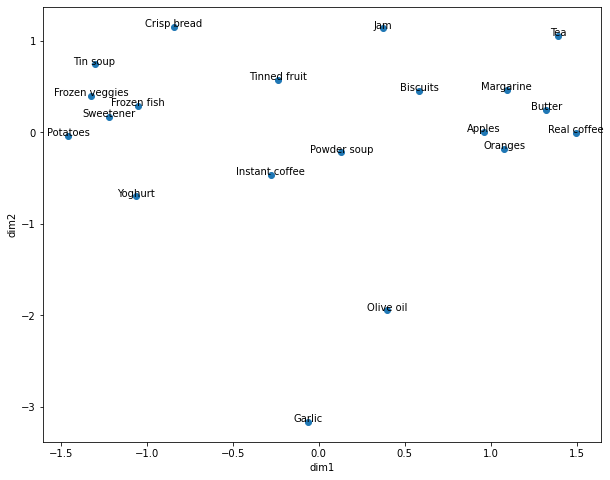

In [9]:
# plt.figure(figsize=(10, 10), dpi=80)
# plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plt.rcParams["figure.figsize"] = [10.00, 8.0]
fig, ax = plt.subplots()
ax.scatter(dim1, dim2)
plt.xlabel('dim1')
plt.ylabel('dim2')

for i, txt in enumerate(food):
    ax.annotate(txt, (dim1[i], dim2[i]), ha='center')

We see datapoints of similar food types are close to each other example apples and oranges which are food. These 2 datapoints are also close to datapoints of real coffee, butter and margarine, it seems like food for breakfast. 

Similarly, frozen foods like frozen veggies and frozen fish data points are also close to each other